# 17 - SVC with Parameters

*Simply speaking, the C parameter is a regularization parameter used to set the tolerance of the model to allow the misclassification of data points in order to achieve lower generalization error.Higher the value of C, lesser is the tolerance and what is trained is a maximum-margin classifier. Smaller the value of C, larger is the tolerance of misclassification and what gets trained is a soft-margin classifier that generalizes better than maximum-margin classifier.*

*The C parameter is a tuning parameter that controls how much weight we should put on the data points that are incorrectly classified.*

*The higher C,the smaller margin,it might be caused overfitting*

*The lower C,the larger margin,it might included misclassified points and causes soft margin.*

*With a larger value of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. The model may overfit with the training dataset. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.*

*The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.*

*Low values of Gamma indicate a large similarity radius which results in more points being grouped together.*

*For High values of Gamma, the points need to be very close to each other in order for it to be considered in the same group.*

*When gamma is very small (0.008 or 0.01), the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of a high density of any pair of two classes.*

*For intermediate values of gamma (0.05, 0.1, 0.5), it can see on the second plot that good models can be found.*

*For larger values of gamma (3.0, 7.0, 11.0) in the above plot, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.*


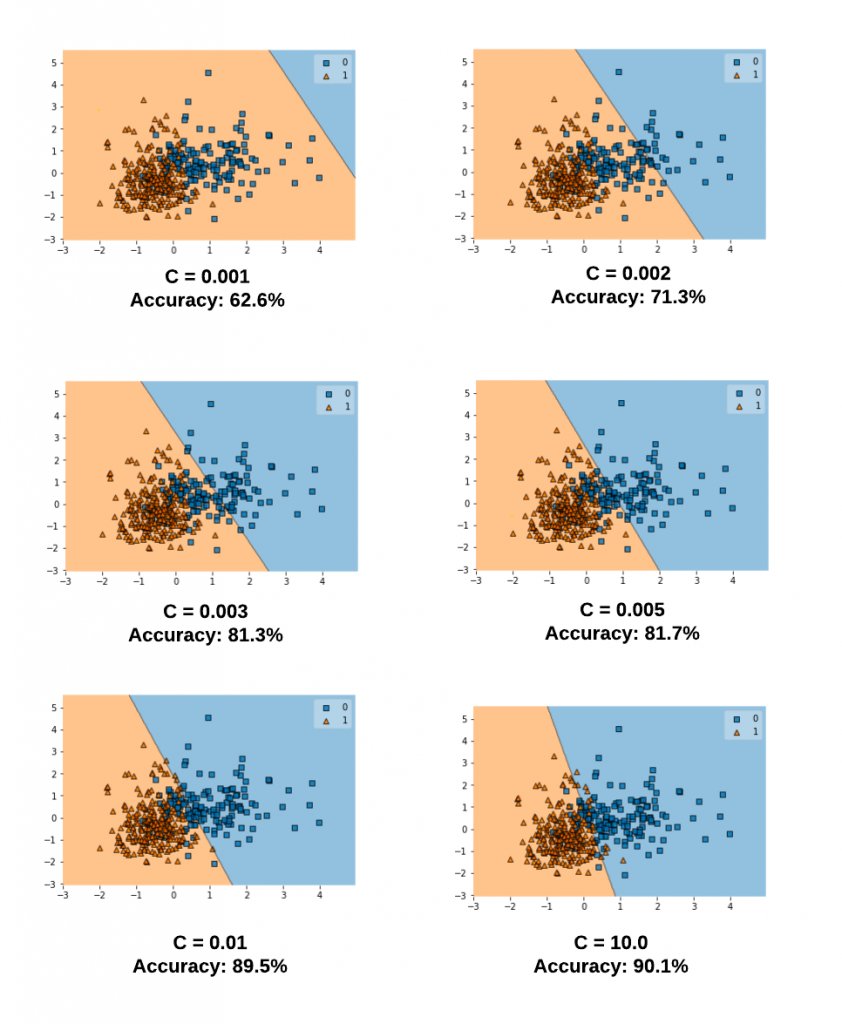

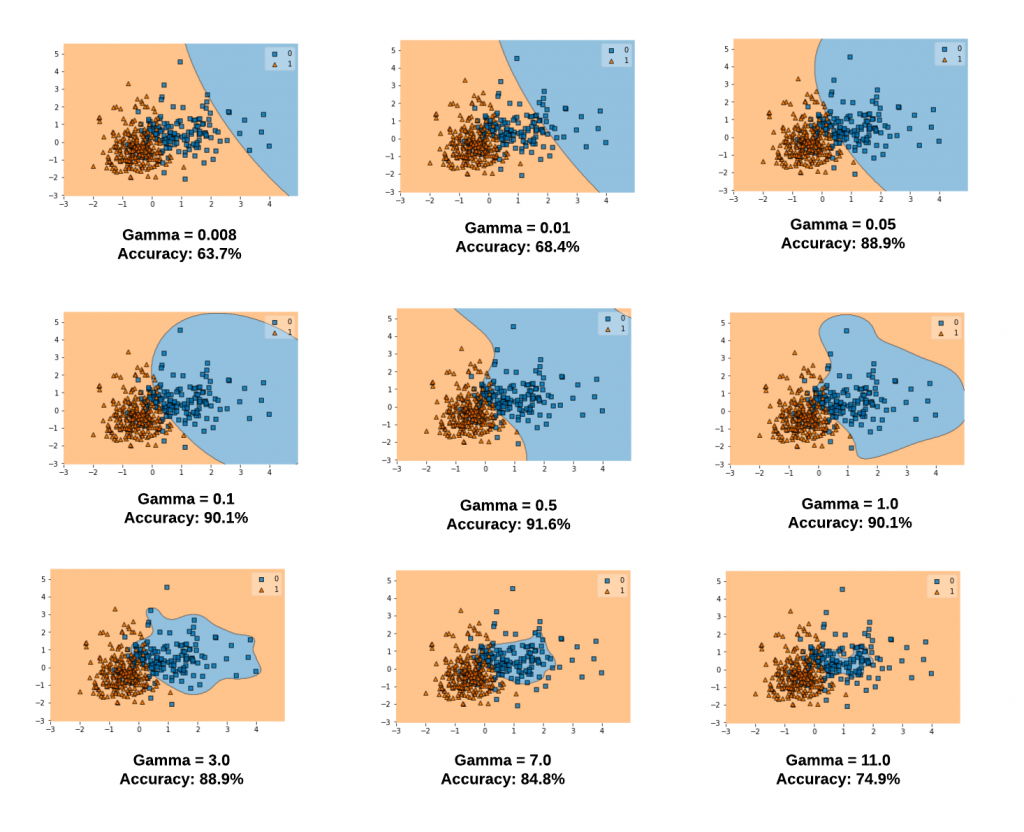

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [2]:
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
zero_one_colourmap_pts = ListedColormap(('red', 'green'))
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))

In [4]:
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                     stop = X_set[:, 0].max() + 1, 
                                     step = 0.01),
                           np.arange(start = X_set[:, 1].min() - 1, 
                                     stop = X_set[:, 1].max() + 1, 
                                     step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                 X2.ravel()]).T).reshape(X1.shape),
                   alpha = 0.75, 
                   cmap = zero_one_colourmap_boundary)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colourmap_pts)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [5]:
def generate_clf(input_gamma, input_C=1):
    classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
    classifier.fit(X, y.ravel())
    y_pred = classifier.predict(X)
    print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
    return classifier

In [6]:
X, y = make_classification(n_samples=200, n_features=2,
n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=44)


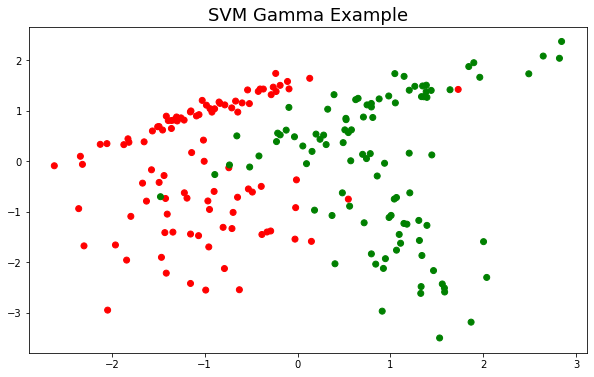

In [7]:
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)

# Gamma = 0.001

Training Accuracy = 0.505


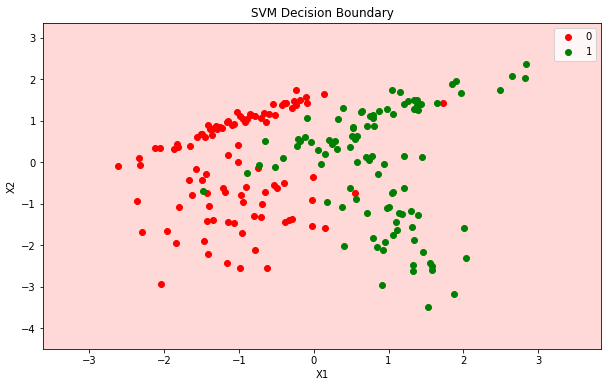

In [8]:
classifier_1 = generate_clf(0.001)
plot_decision_boundary(X, y, classifier_1)

# Gamma = 0.01

Training Accuracy = 0.505


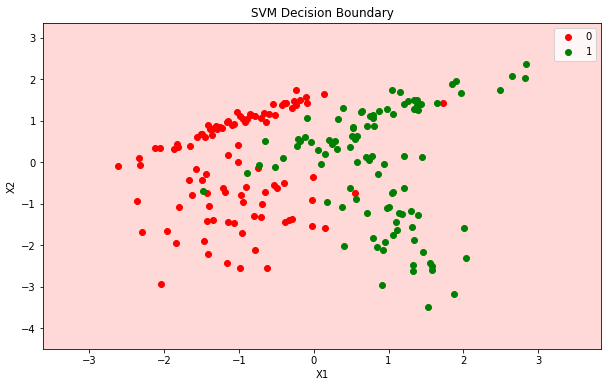

In [9]:
classifier_2 = generate_clf(0.01)
plot_decision_boundary(X, y, classifier_2)

# Gamma = 0.1

Training Accuracy = 0.795


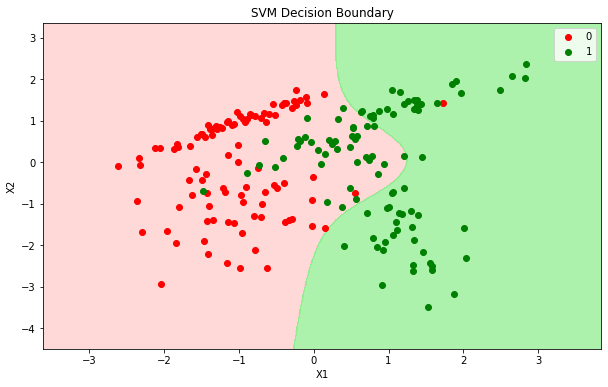

In [10]:
classifier_3 = generate_clf(0.1)
plot_decision_boundary(X, y, classifier_3)

# Gamma = 1

Training Accuracy = 0.93


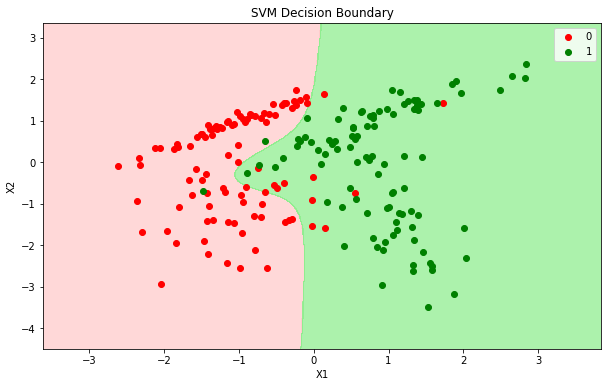

In [11]:
classifier_4 = generate_clf(1)
plot_decision_boundary(X, y, classifier_4)

# Gamma = 0.1 C = 0.1

Training Accuracy = 0.605


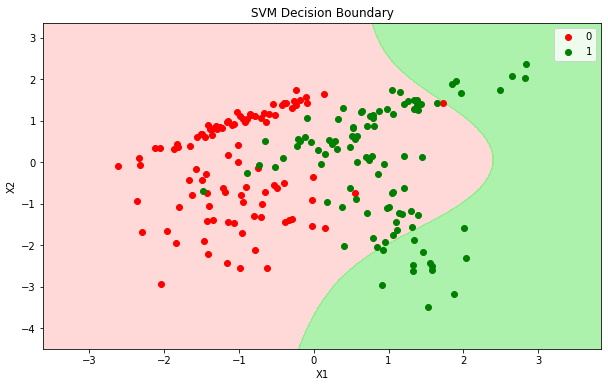

In [12]:
classifier_5 = generate_clf(0.1, 0.1)
plot_decision_boundary(X, y, classifier_5)

# Gamma = 0.1 C = 1

Training Accuracy = 0.795


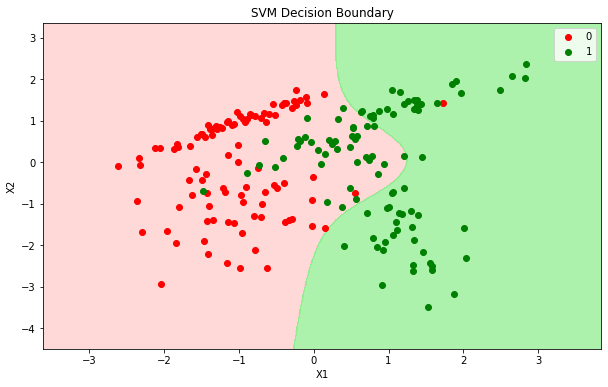

In [13]:
classifier_6 = generate_clf(0.1, 1)
plot_decision_boundary(X, y, classifier_6)

# Gamma = 0.1 C = 10

Training Accuracy = 0.94


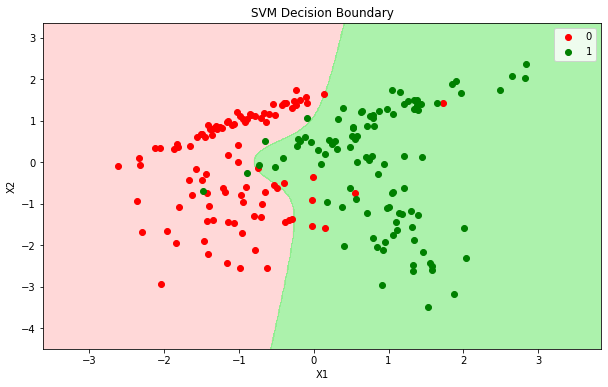

In [14]:
classifier_7 = generate_clf(0.1, 10)
plot_decision_boundary(X, y, classifier_7)